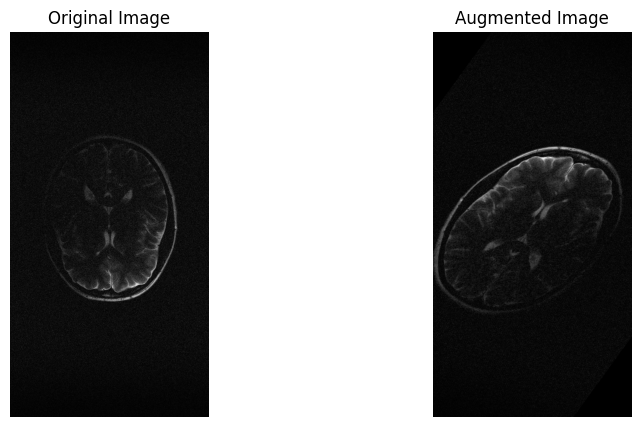

Original Image - Shape: (768, 396), Min: 0.0000, Max: 0.0001
Augmented Image - Shape: (768, 396), Min: 0.0000, Max: 0.0001


In [108]:
import h5py
import numpy as np
import torch
from utils.mraugment.data_augment import DataAugmentor
from fastmri import ifft2c, complex_abs
import matplotlib.pyplot as plt

# Helper function to display images and their properties
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    # Display image properties
    print(f"{title} - Shape: {image.shape}, Min: {np.min(image):.4f}, Max: {np.max(image):.4f}")

def compare_images(original, augmented):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis('off')
    
    ax[1].imshow(augmented, cmap='gray')
    ax[1].set_title("Augmented Image")
    ax[1].axis('off')
    
    plt.show()
    
    # Display properties of the original and augmented images
    print(f"Original Image - Shape: {original.shape}, Min: {np.min(original):.4f}, Max: {np.max(original):.4f}")
    print(f"Augmented Image - Shape: {augmented.shape}, Min: {np.min(augmented):.4f}, Max: {np.max(augmented):.4f}")

# Load k-space data from .h5 file
def load_kspace_from_h5(filepath):
    with h5py.File(filepath, 'r') as f:
        kspace = f['kspace'][:]  # Load the kspace dataset
        mask = f['mask'][:]  # Load the mask dataset if needed
    return kspace, mask

# Example: load one file from the dataset
kspace, mask = load_kspace_from_h5('/home/Data/train/kspace/brain_acc4_5.h5')

# Choose a slice (for example, slice 0)
kspace_slice = kspace[0]

# Convert k-space slice to tensor (as expected by the augmentor)
# Split real and imaginary parts and stack them along the last dimension
kspace_tensor = torch.stack((torch.from_numpy(kspace_slice.real), torch.from_numpy(kspace_slice.imag)), dim=-1)

# Define augmentation parameters
class HParams:
    def __init__(self):
        self.aug_on = True  # 증강을 활성화
        self.aug_strength = 1  # 증강 강도
        self.aug_weight_translation = 1.0  # 이동 증강 가중치
        self.aug_weight_rotation = 1.0  # 회전 증강 가중치
        self.aug_weight_scaling = 1.0  # 스케일링 증강 가중치
        self.aug_weight_shearing = 1.0  # 전단 증강 가중치
        self.aug_weight_rot90 = 0.0  # 90도 회전 증강 가중치, crop의 주범
        self.aug_weight_fliph = 1.0  # 수평 뒤집기 증강 가중치
        self.aug_weight_flipv = 1.0  # 수직 뒤집기 증강 가중치
        self.aug_max_translation_x = 0.125  # 최대 수평 이동 범위
        self.aug_max_translation_y = 0.125  # 최대 수직 이동 범위
        self.aug_max_rotation = 180.0  # 최대 회전 범위
        self.aug_max_scaling = 0.25  # 최대 스케일링 범위
        self.aug_max_shearing_x = 15.0  # 최대 수평 전단 범위
        self.aug_max_shearing_y = 15.0  # 최대 수직 전단 범위
        self.aug_interpolation_order = 100  # 데이터 증강 시 사용할 보간 순서
        self.max_train_resolution = None  # 최대 훈련 해상도
        
        # 추가적인 파라미터: 업샘플링 관련
        self.aug_upsample = False  # 업샘플링 여부
        self.aug_upsample_factor = 2  # 업샘플링 배수
        self.aug_upsample_order = 1  # 업샘플링 시 사용할 필터 순서

        # 스케줄링 파라미터
        self.aug_schedule = 'constant'  # 증강 스케줄링 방법
        self.aug_delay = 0  # 증강 시작 지연 시간
        self.aug_exp_decay = 5.0  # 증강 지수 감소 계수

hparams = HParams()

# Create the DataAugmentor object
augmentor = DataAugmentor(hparams, total_epoch=10)

# Perform augmentation on the k-space data
kspace_augmented, target = augmentor(kspace_tensor.unsqueeze(0), target_size=(kspace_slice.shape[1], kspace_slice.shape[2]))

# Convert k-space to images for visualization
original_image = complex_abs(ifft2c(kspace_tensor)).numpy().squeeze()
augmented_image = complex_abs(ifft2c(kspace_augmented)).numpy().squeeze()

# 원본 데이터와 증강된 데이터가 다차원 배열이라면, 첫 번째 이미지(또는 원하는 이미지)를 선택합니다.
original_image = original_image[0]  # 첫 번째 이미지 선택
augmented_image = augmented_image[0]  # 첫 번째 이미지 선택

# Visualize the original and augmented images
compare_images(original_image, augmented_image)

In [ ]:
import h5py
import numpy as np
import torch
from utils.mraugment.data_augment import DataAugmentor
from fastmri import ifft2c, complex_abs
import matplotlib.pyplot as plt

# Helper function to display images and their properties
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    # Display image properties
    print(f"{title} - Shape: {image.shape}, Min: {np.min(image):.4f}, Max: {np.max(image):.4f}")

def compare_images(original, augmented):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis('off')
    
    ax[1].imshow(augmented, cmap='gray')
    ax[1].set_title("Augmented Image")
    ax[1].axis('off')
    
    plt.show()
    
    # Display properties of the original and augmented images
    print(f"Original Image - Shape: {original.shape}, Min: {np.min(original):.4f}, Max: {np.max(original):.4f}")
    print(f"Augmented Image - Shape: {augmented.shape}, Min: {np.min(augmented):.4f}, Max: {np.max(augmented):.4f}")

# Load k-space data from .h5 file
def load_kspace_from_h5(filepath):
    with h5py.File(filepath, 'r') as f:
        kspace = f['kspace'][:]  # Load the kspace dataset
        mask = f['mask'][:]  # Load the mask dataset if needed
    return kspace, mask

# Example: load one file from the dataset
kspace, mask = load_kspace_from_h5('/home/Data/train/kspace/brain_acc4_5.h5')

# Choose a slice (for example, slice 0)
kspace_slice = kspace[0]

# Convert k-space slice to tensor (as expected by the augmentor)
# Split real and imaginary parts and stack them along the last dimension
kspace_tensor = torch.stack((torch.from_numpy(kspace_slice.real), torch.from_numpy(kspace_slice.imag)), dim=-1)

# Define augmentation parameters
class HParams:
    def __init__(self):
        self.aug_on = True  # 증강을 활성화
        self.aug_strength = 1  # 증강 강도
        self.aug_weight_translation = 1.0  # 이동 증강 가중치
        self.aug_weight_rotation = 1.0  # 회전 증강 가중치
        self.aug_weight_scaling = 1.0  # 스케일링 증강 가중치
        self.aug_weight_shearing = 1.0  # 전단 증강 가중치
        self.aug_weight_rot90 = 0.0  # 90도 회전 증강 가중치, crop의 주범
        self.aug_weight_fliph = 0.0  # 수평 뒤집기 증강 가중치
        self.aug_weight_flipv = 0.0  # 수직 뒤집기 증강 가중치
        self.aug_max_translation_x = 0.125  # 최대 수평 이동 범위
        self.aug_max_translation_y = 0.125  # 최대 수직 이동 범위
        self.aug_max_rotation = 10.0  # 최대 회전 범위
        self.aug_max_scaling = 0.1  # 최대 스케일링 범위
        self.aug_max_shearing_x = 1.0  # 최대 수평 전단 범위
        self.aug_max_shearing_y = 1.0  # 최대 수직 전단 범위
        self.aug_interpolation_order = 1  # 데이터 증강 시 사용할 보간 순서
        self.max_train_resolution = None  # 최대 훈련 해상도
        
        # 추가적인 파라미터: 업샘플링 관련
        self.aug_upsample = False  # 업샘플링 여부
        self.aug_upsample_factor = 2  # 업샘플링 배수
        self.aug_upsample_order = 1  # 업샘플링 시 사용할 필터 순서

        # 스케줄링 파라미터
        self.aug_schedule = 'constant'  # 증강 스케줄링 방법
        self.aug_delay = 0  # 증강 시작 지연 시간
        self.aug_exp_decay = 5.0  # 증강 지수 감소 계수

hparams = HParams()

# Create the DataAugmentor object
augmentor = DataAugmentor(hparams, total_epoch=10)

# Perform augmentation on the k-space data
kspace_augmented, target = augmentor(kspace_tensor.unsqueeze(0), target_size=(kspace_slice.shape[1], kspace_slice.shape[2]))

# Convert k-space to images for visualization
original_image = complex_abs(ifft2c(kspace_tensor)).numpy().squeeze()
augmented_image = complex_abs(ifft2c(kspace_augmented)).numpy().squeeze()

# 원본 데이터와 증강된 데이터가 다차원 배열이라면, 첫 번째 이미지(또는 원하는 이미지)를 선택합니다.
original_image = original_image[0]  # 첫 번째 이미지 선택
augmented_image = augmented_image[0]  # 첫 번째 이미지 선택

# Visualize the original and augmented images
compare_images(original_image, augmented_image)

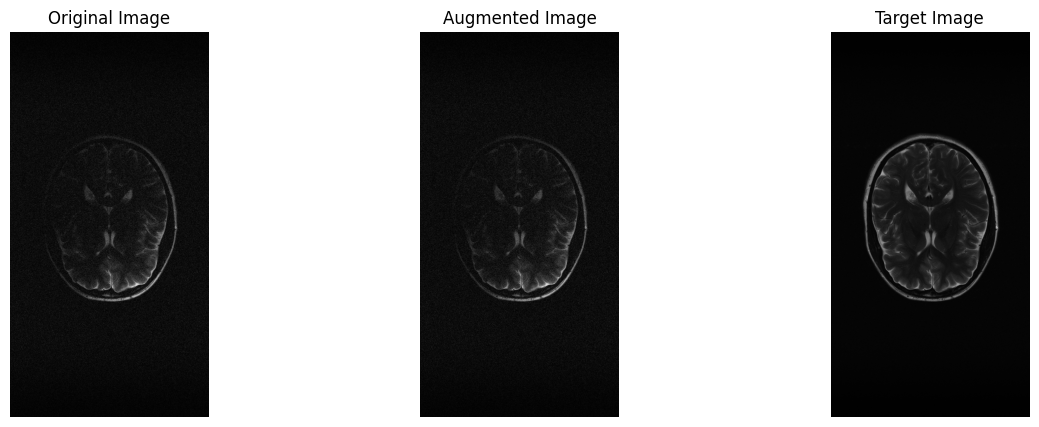

Original Image - Shape: (768, 396), Min: 0.0000, Max: 0.0001
Augmented Image - Shape: (768, 396), Min: 0.0000, Max: 0.0001
Target Image - Shape: (768, 396), Min: 0.0000, Max: 0.0008


In [164]:
import h5py
import numpy as np
import torch
from utils.mraugment.data_augment import DataAugmentor
from fastmri import ifft2c, complex_abs
import matplotlib.pyplot as plt

# Helper function to display images and their properties
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    # Display image properties
    print(f"{title} - Shape: {image.shape}, Min: {np.min(image):.4f}, Max: {np.max(image):.4f}")

def compare_images(original, augmented, target_image):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display original image
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original Image")
    ax[0].axis('off')
    
    # Display augmented image
    ax[1].imshow(augmented, cmap='gray')
    ax[1].set_title("Augmented Image")
    ax[1].axis('off')
    
    # Display target image
    ax[2].imshow(target_image, cmap='gray')
    ax[2].set_title("Target Image")
    ax[2].axis('off')
    
    plt.show()
    
    # Display properties of the original, augmented, and target images
    print(f"Original Image - Shape: {original.shape}, Min: {np.min(original):.4f}, Max: {np.max(original):.4f}")
    print(f"Augmented Image - Shape: {augmented.shape}, Min: {np.min(augmented):.4f}, Max: {np.max(augmented):.4f}")
    print(f"Target Image - Shape: {target_image.shape}, Min: {np.min(target_image):.4f}, Max: {np.max(target_image):.4f}")

# Load k-space data from .h5 file
def load_kspace_from_h5(filepath):
    with h5py.File(filepath, 'r') as f:
        kspace = f['kspace'][:]  # Load the kspace dataset
        mask = f['mask'][:]  # Load the mask dataset if needed
    return kspace, mask

# Example: load one file from the dataset
kspace, mask = load_kspace_from_h5('/home/Data/train/kspace/brain_acc4_5.h5')

# Choose a slice (for example, slice 0)
kspace_slice = kspace[0]

# Convert k-space slice to tensor (as expected by the augmentor)
# Split real and imaginary parts and stack them along the last dimension
kspace_tensor = torch.stack((torch.from_numpy(kspace_slice.real), torch.from_numpy(kspace_slice.imag)), dim=-1)

# Define augmentation parameters
class HParams:
    def __init__(self):
        self.aug_on = True  # 증강을 활성화
        self.aug_strength = 1  # 증강 강도
        self.aug_weight_translation = 0.0  # 이동 증강 가중치
        self.aug_weight_rotation = 0.0  # 회전 증강 가중치
        self.aug_weight_scaling = 0.0  # 스케일링 증강 가중치
        self.aug_weight_shearing = 0.0  # 전단 증강 가중치
        self.aug_weight_rot90 = 0.0  # 90도 회전 증강 가중치, crop의 주범
        self.aug_weight_fliph = 0.0  # 수평 뒤집기 증강 가중치
        self.aug_weight_flipv = 0.0  # 수직 뒤집기 증강 가중치
        self.aug_max_translation_x = 0.0  # 최대 수평 이동 범위
        self.aug_max_translation_y = 0.0  # 최대 수직 이동 범위
        self.aug_max_rotation = 10.0  # 최대 회전 범위
        self.aug_max_scaling = 0.1  # 최대 스케일링 범위
        self.aug_max_shearing_x = 0.0  # 최대 수평 전단 범위
        self.aug_max_shearing_y = 0.0  # 최대 수직 전단 범위
        self.aug_interpolation_order = 1  # 데이터 증강 시 사용할 보간 순서
        self.max_train_resolution = None  # 최대 훈련 해상도
        
        # 추가적인 파라미터: 업샘플링 관련
        self.aug_upsample = False  # 업샘플링 여부
        self.aug_upsample_factor = 2  # 업샘플링 배수
        self.aug_upsample_order = 1  # 업샘플링 시 사용할 필터 순서

        # 스케줄링 파라미터
        self.aug_schedule = 'constant'  # 증강 스케줄링 방법
        self.aug_delay = 0  # 증강 시작 지연 시간
        self.aug_exp_decay = 5.0  # 증강 지수 감소 계수

hparams = HParams()

# Create the DataAugmentor object
augmentor = DataAugmentor(hparams, total_epoch=10)

# Perform augmentation on the k-space data
kspace_augmented, target = augmentor(kspace_tensor.unsqueeze(0), target_size=(kspace_slice.shape[1], kspace_slice.shape[2]))

# Convert k-space to images for visualization
original_image = complex_abs(ifft2c(kspace_tensor)).numpy().squeeze()
augmented_image = complex_abs(ifft2c(kspace_augmented)).numpy().squeeze()
# target_image = complex_abs(ifft2c(target)).numpy().squeeze()  # Convert target to image

# Convert target image to numpy
target_image = target.numpy()

# 원본 데이터와 증강된 데이터가 다차원 배열이라면, 첫 번째 이미지(또는 원하는 이미지)를 선택합니다.
original_image = original_image[0]  # 첫 번째 이미지 선택
augmented_image = augmented_image[0]  # 첫 번째 이미지 선택
target_image = target_image[0]  # 첫 번째 target 이미지 선택

# Visualize the original, augmented, and target images
compare_images(original_image, augmented_image, target_image)


# FASTMRI 참고해서 만들기

In [94]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt

In [19]:
file_name = '/home/Data/train/kspace/brain_acc8_25.h5'
hf = h5py.File(file_name)
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: ['kspace', 'mask']
Attrs: {}


In [20]:
volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)

complex64
(16, 16, 768, 396)


In [22]:
slice_kspace = volume_kspace[10] # Choosing the 20-th slice of this volume

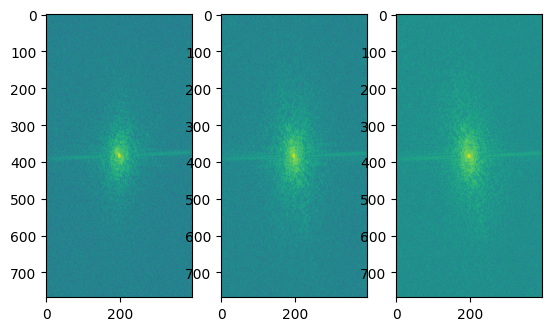

In [26]:
def show_coils(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)
show_coils(np.log(np.abs(slice_kspace) + 1e-9), [0, 2, 3])  # This shows coils 0, 2 and 3